<a href="https://colab.research.google.com/github/chittoorking/Bike-Sharing-Demand-Prediction/blob/main/ADA_project_code_daily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting to the drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Changing the path to the folder containing the datasets 
%cd /content/drive/MyDrive/Bike-Sharing-Dataset

/content/drive/MyDrive/Bike-Sharing-Dataset


**we will dig deeper into the data and apply various machine learning regression techniques like Decision Trees, Random Forest and Ada boost regressor. We will find the best hyperparameters by parameter tuning using GridSearchCV for every regressor algorithm.**


**After analysing errors of each model, We will select a model which gives us the least  Mean Squared  Error(MSE) score and best r2_score and build a model using it.**

# **Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import calendar
%matplotlib inline
import missingno as msno
from datetime import datetime 

# Loading Day wise dataset

Predication of bike rental count  daily based on the environmental and seasonal settings.

In [ ]:
df_daily = pd.read_csv("/content/drive/MyDrive/Bike-Sharing-Dataset/day.csv")
df_daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Understanding the data

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

# Data Preprocessing



In [ ]:
#Creating a tempDate column
df_daily['tempDate'] = df_daily.dteday.apply(lambda x:x.split())

In [ ]:
#Loading the first five columns
df_daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,tempDate
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,[01-01-2011]
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,[02-01-2011]
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,[03-01-2011]
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,[04-01-2011]
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,[05-01-2011]


In [ ]:
#splitting the tempDate column into year ,month ,day and finding the weekday
df_daily['year'] = df_daily.tempDate.apply(lambda x:x[0].split('-')[2])
df_daily['month'] = df_daily.tempDate.apply(lambda x:x[0].split('-')[1])
df_daily['day'] = df_daily.tempDate.apply(lambda x:x[0].split('-')[0])
df_daily['weekday'] = df_daily.tempDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0],"%d-%m-%Y").weekday()])

In [ ]:
df_daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,tempDate,year,month,day
0,1,01-01-2011,1,0,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,[01-01-2011],2011,01,01
1,2,02-01-2011,1,0,1,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,[02-01-2011],2011,01,02
2,3,03-01-2011,1,0,1,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,[03-01-2011],2011,01,03
3,4,04-01-2011,1,0,1,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,[04-01-2011],2011,01,04
4,5,05-01-2011,1,0,1,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,[05-01-2011],2011,01,05


# **Anomaly detection**

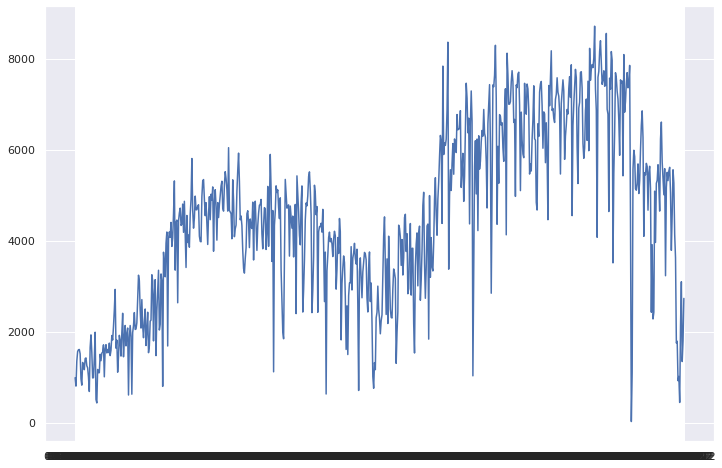

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df_daily['dteday'],df_daily['cnt'])
plt.show()

In [ ]:
df_anomaly = df_daily[np.abs(df_daily["cnt"]-df_daily["cnt"].mean()) >=(2*df_daily["cnt"].std())]

In [ ]:
df_anomaly

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,tempDate,year,month,day
25,26,26-01-2011,1,0,1,0,Wednesday,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506,[26-01-2011],2011,01,26
26,27,27-01-2011,1,0,1,0,Thursday,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431,[27-01-2011],2011,01,27
64,65,06-03-2011,1,0,3,0,Sunday,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605,[06-03-2011],2011,03,06
68,69,10-03-2011,1,0,3,0,Thursday,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623,[10-03-2011],2011,03,10
301,302,29-10-2011,4,0,10,0,Saturday,0,3,0.254167,0.227913,0.882500,0.351371,57,570,627,[29-10-2011],2011,10,29
623,624,15-09-2012,3,1,9,0,Saturday,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714,[15-09-2012],2012,09,15
630,631,22-09-2012,3,1,9,0,Saturday,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395,[22-09-2012],2012,09,22
637,638,29-09-2012,4,1,9,0,Saturday,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555,[29-09-2012],2012,09,29
667,668,29-10-2012,4,1,10,0,Monday,1,3,0.440000,0.439400,0.880000,0.358200,2,20,22,[29-10-2012],2012,10,29
725,726,26-12-2012,1,1,12,0,Wednesday,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441,[26-12-2012],2012,12,26


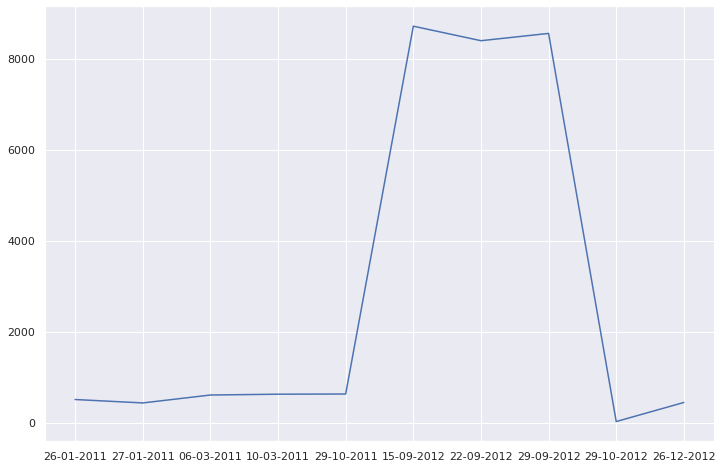

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df_anomaly['dteday'],df_anomaly['cnt'])
plt.show()

# **Few Reasons why few of the above anamolies might have happened are analyzed**

# 1.Reasons for having high bike rental demand on 29-09-2012 might be

On September 29, 2013, a group of motorcyclists were participating in an annual rally, titled "Hollywood Stuntz," organized by a man named Jamie Lao.[4] Rallies organized by Lao in the past involved performing motorcycle stunts and an unauthorized ride through Times Square, Manhattan. During the 2012 ride a year prior, "well over a thousand motorcycles, dirt bikes, quads, four-wheel vehicles" rode through Times Square, according to New York Police Commissioner Raymond Kelly. The group did not have permits to do so.[5][6] Driving through the section of Broadway within Times Square has been illegal since it was pedestrianized in 2009. Kelly reported that the altercation with Lien was not the only problem involving the group on September 29, as over 200 other people had complained to the police about the reckless driving of the bikers on Manhattan's streets that day.



# 2.Reasons for having bike rental demand on 2012-10-30 might be

---



query like "2012-10-30 washington d.c." in Google returns related results to 
Hurricane Sandy.

In [ ]:
df_daily = df_daily.drop('tempDate',axis=1) 
df_daily = df_daily.drop('dteday',axis=1)
df_daily = df_daily.drop('instant',axis=1)

# **Missing value analysis**

In [ ]:
df_daily.isna().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
year          0
month         0
day           0
dtype: int64

In [ ]:
#summary statistics about the dataframe such as the mean, maximum and minimum values. 
#At the top of the table is a row called counts
df_daily.describe()

,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
#we have a more concise summary of the state of the data and the extent of data missingness 
#We can also look at the datatypes of each column
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    object 
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
 14  year        731 non-null    object 
 15  month       731 non-null    object 
 16  day         731 non-null    object 
dtypes: float64(4), int64(9), object(4)
memory usage: 97.2+ KB


In [ ]:
#The newly created columns year,month and day are created as Object datatype
#We need to convert those columns to integer type
df_daily['year']=df_daily['year'].astype('str').astype(int);
df_daily['month']=df_daily['month'].astype('str').astype(int);
df_daily['day']=df_daily['day'].astype('str').astype(int);

In [ ]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    object 
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
 14  year        731 non-null    int64  
 15  month       731 non-null    int64  
 16  day         731 non-null    int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 97.2+ KB


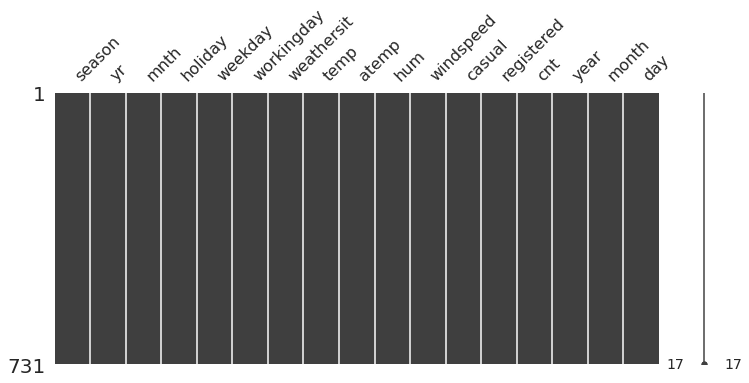

In [ ]:

msno.matrix(df_daily,figsize=(12,5))

Missingno is an excellent and simple to use Python library that provides a series of visualisations 
to understand the presence and distribution of missing data within a pandas dataframe


The matrix plot is a great tool if you are working with depth-related data or time-series data. It provides a colour fill for each column. When data is present, the plot is shaded in grey (or your colour of choice), and when it is absent the plot is displayed in white.


# **Exploratory Data Analytics on Day dataset**

In [ ]:
df_daily.shape

(731, 17)

In [ ]:
df_daily.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day
0,1,0,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,1,1
1,1,0,1,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,1,2
2,1,0,1,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,1,3
3,1,0,1,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,1,4
4,1,0,1,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,1,5


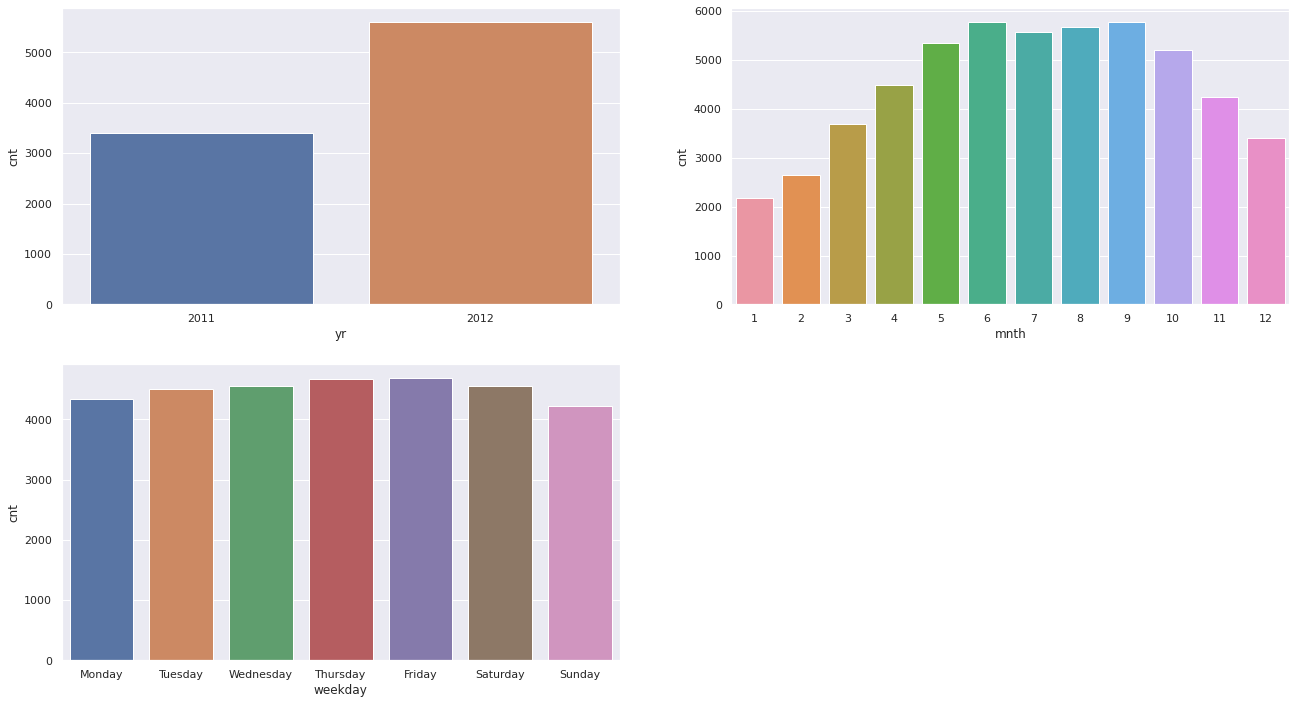

In [ ]:
fig = plt.figure(figsize=[22,12])
ax1 = fig.add_subplot(2,2,1)
my_labels =['2011','2012']
ax1 = sns.barplot(x='yr',y='cnt',data=df_daily.groupby('yr')['cnt'].mean().reset_index())
ax1.set_xticks([0,1])
ax1.set_xticklabels(['2011','2012'])
#month count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='mnth',y='cnt',data=df_daily.groupby('mnth')['cnt'].mean().reset_index())

#day countS
indexes=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='weekday',y='cnt',data=df_daily.groupby('weekday')['cnt'].mean().reindex(indexes).reset_index())

[Text(0, 0, 'Clear'), Text(0, 0, 'Mist'), Text(0, 0, 'Snow')]

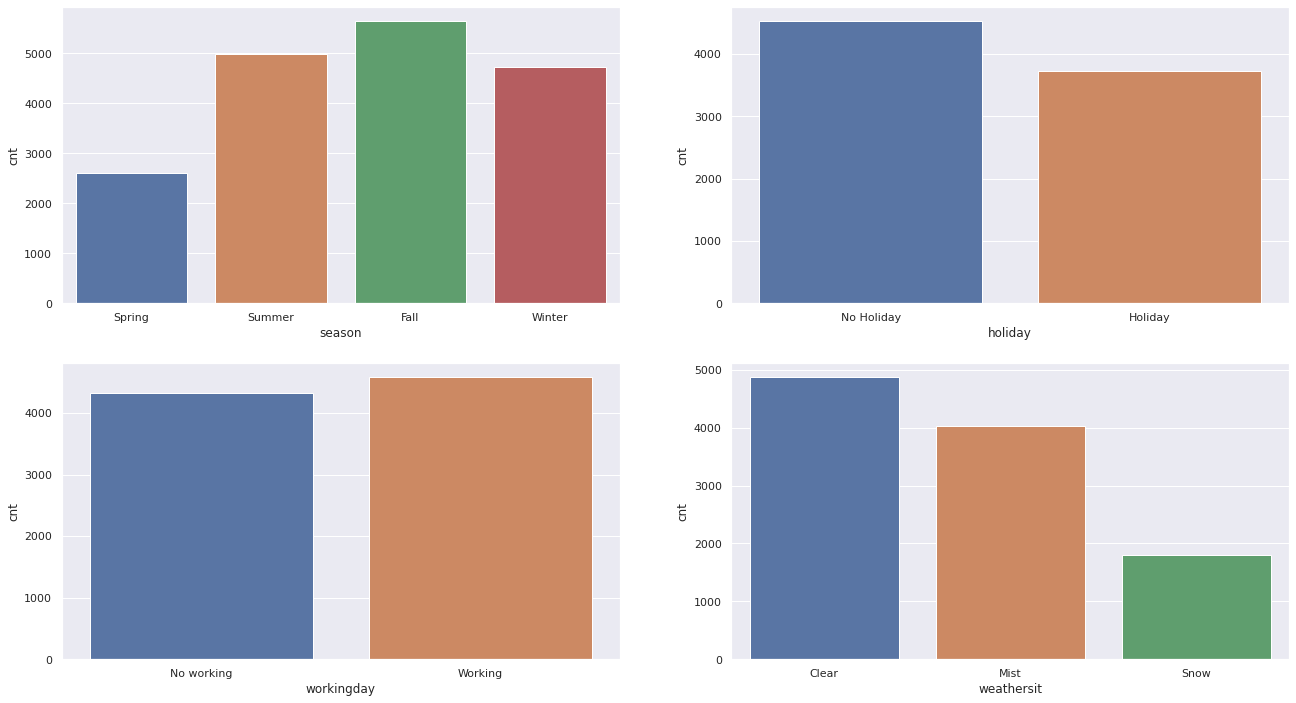

In [ ]:
fig = plt.figure(figsize=[22,12])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season',y='cnt',data=df_daily.groupby('season')['cnt'].mean().reset_index())
ax1.set_xticks([0,1,2,3])
ax1.set_xticklabels(['Spring','Summer','Fall','Winter'])

#holiday based count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='cnt',data=df_daily.groupby('holiday')['cnt'].mean().reset_index())
ax2.set_xticks([0,1])
ax2.set_xticklabels(['No Holiday','Holiday'])
#working day based count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday',y='cnt',data=df_daily.groupby('workingday')['cnt'].mean().reset_index())
ax3.set_xticks([0,1])
ax3.set_xticklabels(['No working','Working'])
#weather situation based count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weathersit',y='cnt',data=df_daily.groupby('weathersit')['cnt'].mean().reset_index())
ax4.set_xticks([0,1,2])
ax4.set_xticklabels(['Clear','Mist','Snow'])

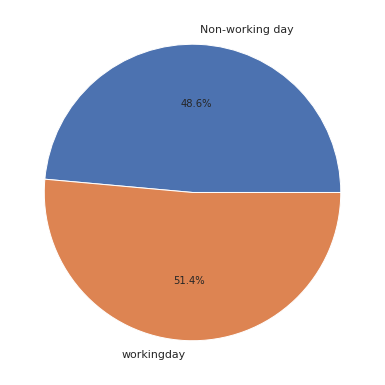

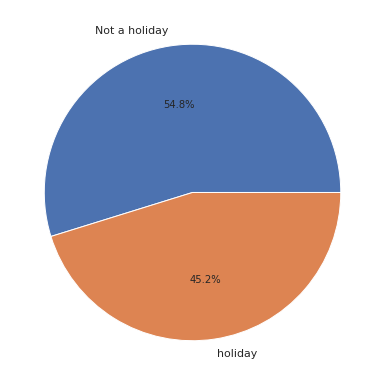

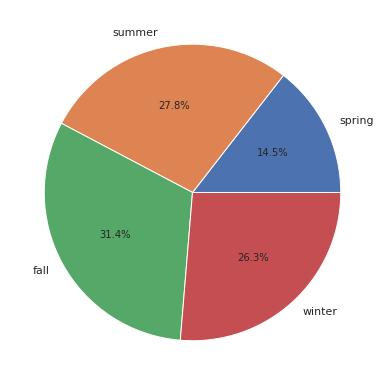

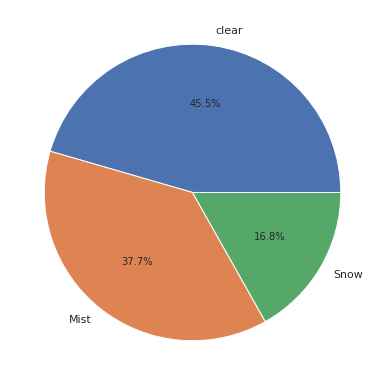

In [ ]:
#workingday based count
data=df_daily.groupby('workingday')['cnt'].mean()
mylabels = ['Non-working day','workingday']
fig = plt.figure(figsize=[25,15])
ax1 = fig.add_subplot(2,2,1)
ax1 = plt.pie(data, labels = mylabels, autopct='%1.1f%%')
plt.show()

#holiday based count
data=df_daily.groupby('holiday')['cnt'].mean()
mylabels = ['Not a holiday','holiday']
fig = plt.figure(figsize=[25,15])
ax2 = fig.add_subplot(2,2,2)
ax2 = plt.pie(data, labels = mylabels, autopct='%1.1f%%')
plt.show()

#season based count
data=df_daily.groupby('season')['cnt'].mean()
mylabels = ['spring','summer','fall','winter']
fig = plt.figure(figsize=[25,15])
ax3 = fig.add_subplot(2,2,3)
ax3 = plt.pie(data, labels = mylabels, autopct='%1.1f%%')
plt.show()

#weatherlist based count
data=df_daily.groupby('weathersit')['cnt'].mean()
mylabels = ['clear','Mist','Snow']
fig = plt.figure(figsize=[25,15])
ax4 = fig.add_subplot(2,2,4)
ax4 = plt.pie(data, labels = mylabels, autopct='%1.1f%%')

plt.show()

# **Outlier detection**

In [ ]:
df_daily.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day
0,1,0,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,1,1
1,1,0,1,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,1,2
2,1,0,1,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,1,3
3,1,0,1,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,1,4
4,1,0,1,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,1,5


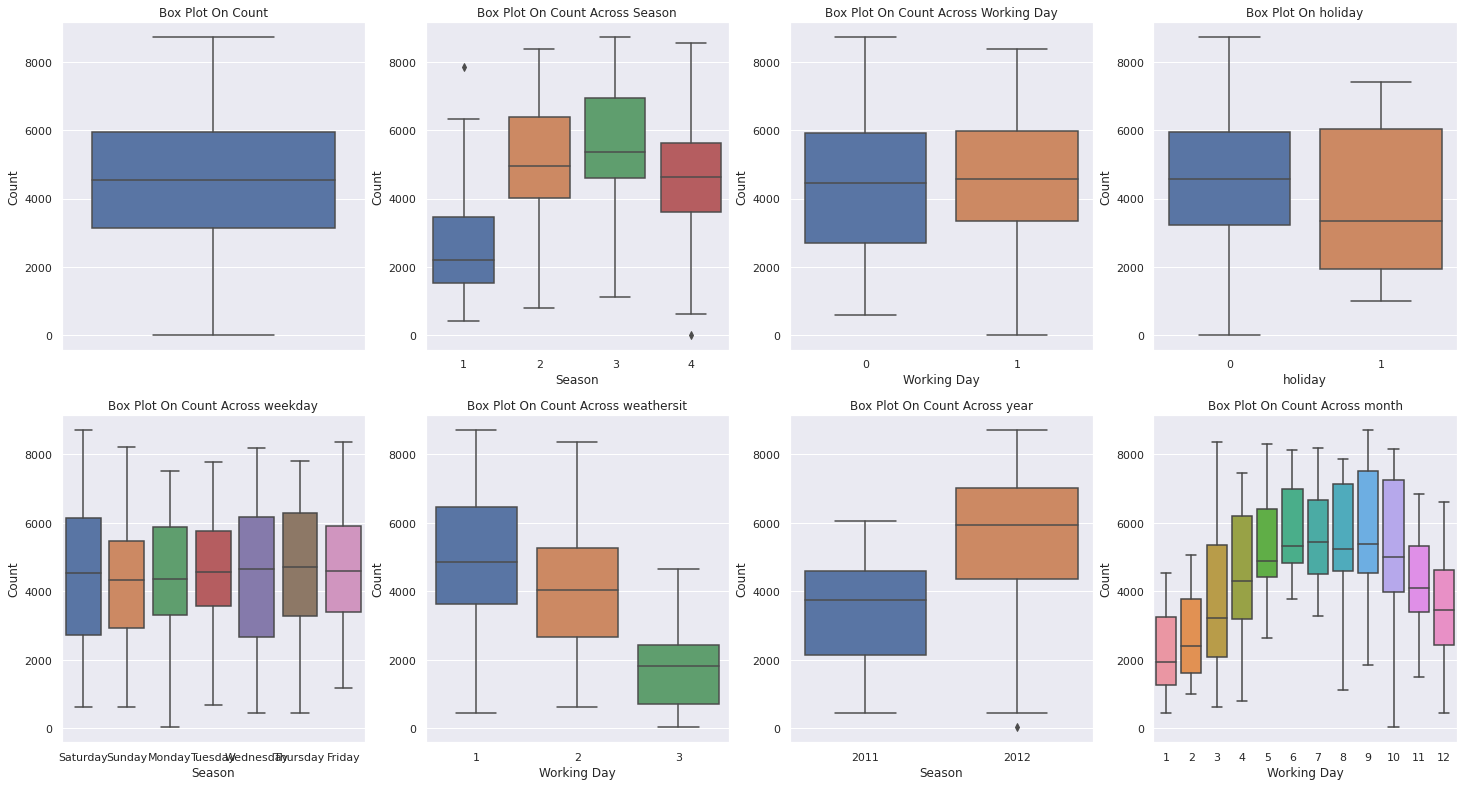

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=4)
fig.set_size_inches(25, 10)
sns.boxplot(data=df_daily,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=df_daily,y="cnt",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=df_daily,y="cnt",x="workingday",orient="v",ax=axes[0][2])
sns.boxplot(data=df_daily,y="cnt",x="holiday",orient="v",ax=axes[0][3])
sns.boxplot(data=df_daily,y="cnt",x="weekday",orient="v",ax=axes[1][0])
sns.boxplot(data=df_daily,y="cnt",x="weathersit",orient="v",ax=axes[1][1])
sns.boxplot(data=df_daily,y="cnt",x="year",orient="v",ax=axes[1][2])
sns.boxplot(data=df_daily,y="cnt",x="month",orient="v",ax=axes[1][3])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[0][2].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[0][3].set(ylabel='Count',title="Box Plot On holiday")
axes[1][0].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across weekday")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across weathersit")
axes[1][2].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across year")
axes[1][3].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across month")

plt.subplots_adjust(bottom=2,top=3)
plt.show()

In [ ]:
trainWithtoutOutlier = df_daily[np.abs(df_daily["year"]-df_daily["cnt"].mean()) <=(1.5*df_daily["cnt"].std())]
trainWithtoutOutlier = df_daily[np.abs(df_daily["season"]-df_daily["season"].mean()) <=(1.5*df_daily["season"].std())]

In [ ]:
print ("Shape Of The Before Ouliers: ",df_daily.shape)
print ("Shape Of The After Ouliers: ",trainWithtoutOutlier.shape)

Shape Of The Before Ouliers:  (731, 17)
Shape Of The After Ouliers:  (731, 17)


In [ ]:
#There are not any outliers

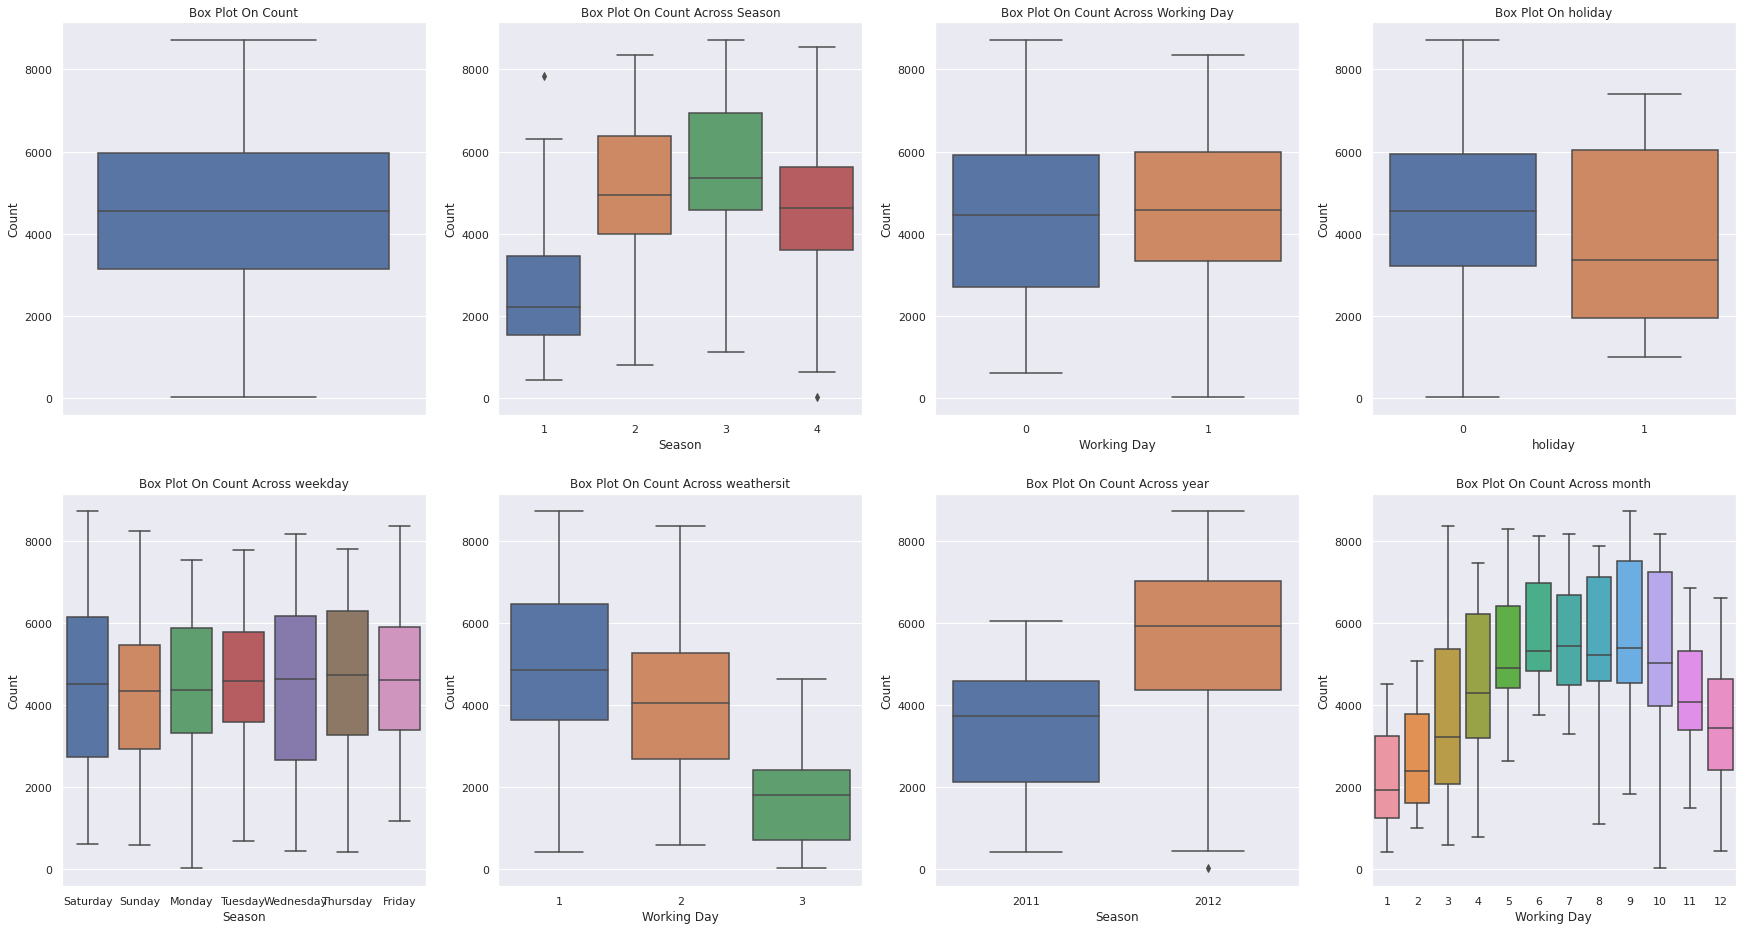

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=4)
fig.set_size_inches(30, 12)
sns.boxplot(data=trainWithtoutOutlier,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=trainWithtoutOutlier,y="cnt",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=trainWithtoutOutlier,y="cnt",x="workingday",orient="v",ax=axes[0][2])
sns.boxplot(data=trainWithtoutOutlier,y="cnt",x="holiday",orient="v",ax=axes[0][3])
sns.boxplot(data=trainWithtoutOutlier,y="cnt",x="weekday",orient="v",ax=axes[1][0])
sns.boxplot(data=trainWithtoutOutlier,y="cnt",x="weathersit",orient="v",ax=axes[1][1])
sns.boxplot(data=trainWithtoutOutlier,y="cnt",x="year",orient="v",ax=axes[1][2])
sns.boxplot(data=trainWithtoutOutlier,y="cnt",x="month",orient="v",ax=axes[1][3])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[0][2].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[0][3].set(ylabel='Count',title="Box Plot On holiday")
axes[1][0].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across weekday")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across weathersit")
axes[1][2].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across year")
axes[1][3].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across month")

plt.subplots_adjust(bottom=2,top=3)
plt.show()

# *Correlation Analysis*

In [ ]:
df_daily.corr()

,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day
season,1.000000,-0.001844,0.831440,-0.010537,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100,-0.001844,0.831440,-0.000861
yr,-0.001844,1.000000,-0.001792,0.007954,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710,1.000000,-0.001792,0.002061
mnth,0.831440,-0.001792,1.000000,0.019191,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977,-0.001792,1.000000,0.009157
holiday,-0.010537,0.007954,0.019191,1.000000,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348,0.007954,0.019191,-0.010710
workingday,0.012485,-0.002013,-0.005901,-0.253023,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156,-0.002013,-0.005901,0.009907
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391,-0.048727,0.043528,-0.023824
temp,0.334315,0.047604,0.220205,-0.028556,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494,0.047604,0.220205,0.024253
atemp,0.342876,0.046106,0.227459,-0.032507,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066,0.046106,0.227459,0.018286
hum,0.205445,-0.110651,0.222204,-0.015937,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659,-0.110651,0.222204,0.042753
windspeed,-0.229046,-0.011817,-0.207502,0.006292,-0.018796,0.039511,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545,-0.011817,-0.207502,0.021588


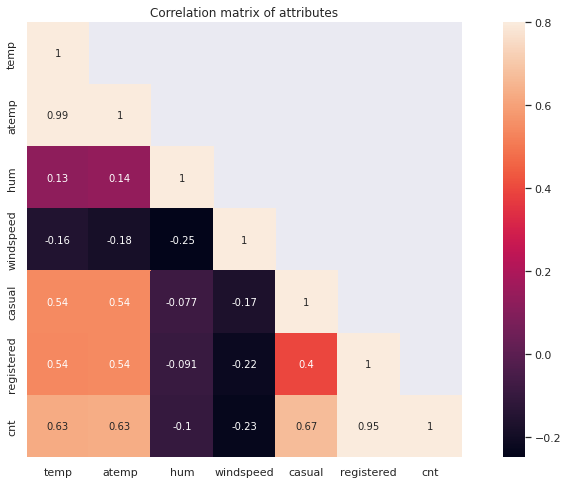

In [ ]:
#Create the correlation matrix
correMtr=df_daily[["temp","atemp","hum","windspeed","casual","registered","cnt"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

In [ ]:
# Dropping season column as it is highly correlated to‘mnth’ column
df_daily.drop('season',axis=1,inplace=True) 
# Dropping atemp column as it is highly correlated to ‘temp’ column
df_daily.drop('atemp',axis=1,inplace=True) 
#Dropping year and month as they are present twice
df_daily.drop('year',axis=1,inplace=True) 
df_daily.drop('month',axis=1,inplace=True) 

In [ ]:
df_daily.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,day
0,0,1,0,Saturday,0,2,0.344167,0.805833,0.160446,331,654,985,1
1,0,1,0,Sunday,0,2,0.363478,0.696087,0.248539,131,670,801,2
2,0,1,0,Monday,1,1,0.196364,0.437273,0.248309,120,1229,1349,3
3,0,1,0,Tuesday,1,1,0.200000,0.590435,0.160296,108,1454,1562,4
4,0,1,0,Wednesday,1,1,0.226957,0.436957,0.186900,82,1518,1600,5


In [ ]:
#Replacing categorical variables with actual values in weathersit
df_daily['weathersit'] = df_daily['weathersit'].replace({1:'clear',2:'mist',3:'snow',4:'rain'})


In [ ]:
# One hot encoding on categorical columns.
df_daily=pd.get_dummies(df_daily,columns=['weathersit','weekday'],drop_first=True)

In [ ]:
df_daily.head()

,yr,mnth,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,day,weathersit_springer,weathersit_summer,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,1,0,0,0.344167,0.805833,0.160446,331,654,985,1,0,1,0,1,0,0,0,0
1,0,1,0,0,0.363478,0.696087,0.248539,131,670,801,2,0,1,0,0,1,0,0,0
2,0,1,0,1,0.196364,0.437273,0.248309,120,1229,1349,3,1,0,1,0,0,0,0,0
3,0,1,0,1,0.200000,0.590435,0.160296,108,1454,1562,4,1,0,0,0,0,0,1,0
4,0,1,0,1,0.226957,0.436957,0.186900,82,1518,1600,5,1,0,0,0,0,0,0,1


We have segregated the data based on ‘workingday’ column as the demand changes significantly on a working day when compared to a non-working day.
We have built two models one to predict ‘casual’ and the other to predict ‘registered’. The predicted ‘count’ is the sum of predicted ‘casual’ and predicted ‘registered’. Here, We are only showing the code to predict ‘registered’ on a working day. Same techniques can be applied to predict ‘casual’ on a working day and ‘casual’, ‘registered’ on a non-working day. You can check the whole code in the end.


# Building model for registered bike rentals

In [ ]:
# Segregating data based on ‘workingday’ column
work_day = df_daily[df_daily['workingday']==1] 
non_work_day = df_daily[df_daily['workingday']==0]

**Model for working days**

In [ ]:
# Model for registered
x = work_day.drop(['casual','registered','cnt','workingday'],axis = 1)
y = work_day.registered
# Dividing the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state = 2)

In [ ]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
result = model1.fit(x_train,y_train)
y_pred = result.predict(x_test)

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 526682.5021514217
r2_score for the data 0.7269987856902445


In [ ]:
# Finding best parameters for decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,1),'min_samples_leaf':np.arange(2,15)}
from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=10)
gs_dt.fit(x_train,y_train)
a = gs_dt.best_params_

In [ ]:
# Training with best parameters
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 524849.3332481482
r2_score for the data 0.7789279082224284


In [ ]:
# Finding best parameters for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=10)
gs_rf.fit(x_train,y_train)
b = gs_rf.best_params_

In [ ]:
# Fitting the model with best params
RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 390773.1989712338
r2_score for the data 0.8176904220786967


In [ ]:
# Finding best parameters for AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,100,25)}
from sklearn.model_selection import GridSearchCV
gs_ar = GridSearchCV(ar,ar_params,cv=5)
gs_ar.fit(x_train,y_train)
c = gs_ar.best_params_


In [ ]:
# Fitting the model with best params
ab_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=c['n_estimators'],random_state=0)
model = ab_rf.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 383203.2035494365
r2_score for the data 0.8184584802180302


In [ ]:
#We got best r2_score and least mean squared error with AdaBoostRegressor model 
#We will select it if we are deploying it in production.

**Model for Non-working days**

In [ ]:
# Model for registered
x = non_work_day.drop(['casual','registered','cnt','workingday'],axis = 1)
y = non_work_day.registered
# Dividing the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state = 2)

In [ ]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
result = model1.fit(x_train,y_train)
y_pred = result.predict(x_test)

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 522103.7914015562
r2_score for the data 0.5752410756446696


In [ ]:
# Finding best parameters for decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,1),'min_samples_leaf':np.arange(2,15)}
from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=10)
gs_dt.fit(x_train,y_train)
a = gs_dt.best_params_

In [ ]:
# Training with best parameters
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 642302.231948495
r2_score for the data 0.48588217139634626


In [ ]:
# Finding best parameters for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=10)
gs_rf.fit(x_train,y_train)
b = gs_rf.best_params_

In [ ]:
# Fitting the model with best params
RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 311973.24900839065
r2_score for the data 0.7258216884136692


In [ ]:
# Finding best parameters for AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,100,25)}
from sklearn.model_selection import GridSearchCV
gs_ar = GridSearchCV(ar,ar_params,cv=5)
gs_ar.fit(x_train,y_train)
c = gs_ar.best_params_

In [ ]:
# Fitting the model with best params
ab_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=c['n_estimators'],random_state=0)
model = ab_rf.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 299575.12113376
r2_score for the data 0.719147220517912


# Building model for casual bike rentals

In [ ]:
# Segregating data based on ‘workingday’ column
work_day = df_daily[df_daily['workingday']==1] 
non_work_day = df_daily[df_daily['workingday']==0]

**Model for working days**

In [ ]:
x = work_day.drop(['casual','registered','cnt','workingday'],axis = 1)
y = work_day.casual
# Dividing the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state = 2)

In [ ]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
result = model1.fit(x_train,y_train)
y_pred = result.predict(x_test)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 42942.58157980533
r2_score for the data 0.5933670414985597


In [ ]:
# Finding best parameters for decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,1),'min_samples_leaf':np.arange(2,15)}
from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=10)
gs_dt.fit(x_train,y_train)
a = gs_dt.best_params_

In [ ]:
# Training with best parameters
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 57563.74079981994
r2_score for the data 0.5447970448884745


In [ ]:
# Finding best parameters for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=10)
gs_rf.fit(x_train,y_train)
b = gs_rf.best_params_

In [ ]:
# Fitting the model with best params
RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 43918.39289579461
r2_score for the data 0.6276223635699258


In [ ]:
# Finding best parameters for AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,100,25)}
from sklearn.model_selection import GridSearchCV
gs_ar = GridSearchCV(ar,ar_params,cv=5)
gs_ar.fit(x_train,y_train)
c = gs_ar.best_params_

In [ ]:
# Fitting the model with best params
ab_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=c['n_estimators'],random_state=0)
model = ab_rf.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)


MSE for the data: 41621.95893782781
r2_score for the data 0.6292062784675707


In [ ]:
#In this case also AdaBoostRegressor is giving the best output for casual bike rentals
#We will use this model if we are deploying it in production
#Note :In the above case the r2_score we got is only 0.63 
#Since casual users are more random than the registered the model is not that great at predicting 
#Hence in this case 0.63 can be considered as a good r2_score

  **Model for Non-working days**

In [ ]:
x = non_work_day.drop(['casual','registered','cnt','workingday'],axis = 1)
y = non_work_day.casual
# Dividing the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state = 2)

In [ ]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
result = model1.fit(x_train,y_train)
y_pred = result.predict(x_test)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 245165.23756501125
r2_score for the data 0.5634671086080872


In [ ]:
# Finding best parameters for decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,1),'min_samples_leaf':np.arange(2,15)}
from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=10)
gs_dt.fit(x_train,y_train)
a = gs_dt.best_params_

In [ ]:
# Training with best parameters
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 191122.1190290945
r2_score for the data 0.7238177993533758


In [ ]:
# Finding best parameters for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=10)
gs_rf.fit(x_train,y_train)
b = gs_rf.best_params_

In [ ]:
# Fitting the model with best params
RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 146910.12462449734
r2_score for the data 0.7755580184431531


In [ ]:
# Finding best parameters for AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,100,25)}
from sklearn.model_selection import GridSearchCV
gs_ar = GridSearchCV(ar,ar_params,cv=5)
gs_ar.fit(x_train,y_train)
c = gs_ar.best_params_

In [ ]:
# Fitting the model with best params
ab_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=c['n_estimators'],random_state=0)
model = ab_rf.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 143677.75532339312
r2_score for the data 0.7356875112590213


# Model Building for cnt 

In [ ]:
# Segregating data based on ‘workingday’ column
work_day = df_daily[df_daily['workingday']==1] 
non_work_day = df_daily[df_daily['workingday']==0]

**Model for working days**

In [ ]:
x = work_day.drop(['casual','registered','cnt','workingday'],axis = 1)
y = work_day.cnt
# Dividing the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state = 2)

In [ ]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
result = model1.fit(x_train,y_train)
y_pred = result.predict(x_test)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 640249.1401510865
r2_score for the data 0.7718907251327742


In [ ]:
# Finding best parameters for decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,1),'min_samples_leaf':np.arange(2,15)}
from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=10)
gs_dt.fit(x_train,y_train)
a = gs_dt.best_params_

In [ ]:
# Training with best parameters
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 620736.561061285
r2_score for the data 0.8090308997622665


In [ ]:
# Finding best parameters for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=10)
gs_rf.fit(x_train,y_train)
b = gs_rf.best_params_

In [ ]:
# Fitting the model with best params
RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 452803.61124522984
r2_score for the data 0.858826384478959


In [ ]:
# Finding best parameters for AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,100,25)}
from sklearn.model_selection import GridSearchCV
gs_ar = GridSearchCV(ar,ar_params,cv=5)
gs_ar.fit(x_train,y_train)
c = gs_ar.best_params_

In [ ]:
# Fitting the model with best params
ab_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=c['n_estimators'],random_state=0)
model = ab_rf.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 469047.1839846259
r2_score for the data 0.8499280918731321


In [ ]:
#Again AdaBoostRregressor is the best model

**Model for Non-working days**

In [ ]:
x = non_work_day.drop(['casual','registered','cnt','workingday'],axis = 1)
y = non_work_day.cnt
# Dividing the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state = 2)

In [ ]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
result = model1.fit(x_train,y_train)
y_pred = result.predict(x_test)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 1083602.5635630684
r2_score for the data 0.6661323871775375


In [ ]:
# Finding best parameters for decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,1),'min_samples_leaf':np.arange(2,15)}
from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=10)
gs_dt.fit(x_train,y_train)
a = gs_dt.best_params_

In [ ]:
# Training with best parameters
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 927796.1974305003
r2_score for the data 0.7157184504443861


In [ ]:
# Finding best parameters for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=10)
gs_rf.fit(x_train,y_train)
b = gs_rf.best_params_

In [ ]:
# Fitting the model with best params
RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 653843.5491918524
r2_score for the data 0.7964308956686346


In [ ]:
# Finding best parameters for AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,100,25)}
from sklearn.model_selection import GridSearchCV
gs_ar = GridSearchCV(ar,ar_params,cv=5)
gs_ar.fit(x_train,y_train)
c = gs_ar.best_params_

In [ ]:
# Fitting the model with best params
ab_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=c['n_estimators'],random_state=0)
model = ab_rf.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 525744.3981968537
r2_score for the data 0.8282466521747489


# Generalized model for deployment with respect to cnt

In [ ]:
x = df_daily.drop(['casual','registered','cnt'],axis = 1)
y = df_daily.cnt
x.head(50)

,yr,mnth,holiday,workingday,temp,hum,windspeed,day,weathersit_springer,weathersit_summer,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,1,0,0,0.344167,0.805833,0.160446,1,0,1,0,1,0,0,0,0
1,0,1,0,0,0.363478,0.696087,0.248539,2,0,1,0,0,1,0,0,0
2,0,1,0,1,0.196364,0.437273,0.248309,3,1,0,1,0,0,0,0,0
3,0,1,0,1,0.200000,0.590435,0.160296,4,1,0,0,0,0,0,1,0
4,0,1,0,1,0.226957,0.436957,0.186900,5,1,0,0,0,0,0,0,1
5,0,1,0,1,0.204348,0.518261,0.089565,6,1,0,0,0,0,1,0,0
6,0,1,0,1,0.196522,0.498696,0.168726,7,0,1,0,0,0,0,0,0
7,0,1,0,0,0.165000,0.535833,0.266804,8,0,1,0,1,0,0,0,0
8,0,1,0,0,0.138333,0.434167,0.361950,9,1,0,0,0,1,0,0,0
9,0,1,0,1,0.150833,0.482917,0.223267,10,1,0,1,0,0,0,0,0


In [ ]:
# Dividing the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state = 2)

In [ ]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
result = model1.fit(x_train,y_train)
y_pred = result.predict(x_test)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 799383.1653506244
r2_score for the data 0.7268478591679416


In [ ]:
# Finding best parameters for decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,1),'min_samples_leaf':np.arange(2,15)}
from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=10)
gs_dt.fit(x_train,y_train)
a = gs_dt.best_params_

In [ ]:
# Training with best parameters
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 617441.7654921587
r2_score for the data 0.8055195185581923


In [ ]:
# Finding best parameters for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=10)
gs_rf.fit(x_train,y_train)
b = gs_rf.best_params_

In [ ]:
# Fitting the model with best params
RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf'],random_state=0)
model_best = RF.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 617441.7654921587
r2_score for the data 0.8055195185581923


In [ ]:
# Finding best parameters for AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,100,25)}
from sklearn.model_selection import GridSearchCV
gs_ar = GridSearchCV(ar,ar_params,cv=5)
gs_ar.fit(x_train,y_train)
c = gs_ar.best_params_

In [ ]:
# Fitting the model with best params
ab_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=c['n_estimators'],random_state=0)
model = ab_rf.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
r2 = r2_score(y_pred,y_test)
print('r2_score for the data',r2)

MSE for the data: 463245.88189044665
r2_score for the data 0.8489198551714614


In [ ]:
#In this case RandomForestRregressor is giving the best r2_score 
#We will try to make a pickle file for it and deploy it in production

In order to deploy a model to some app we need pickle file .Here we create the pickle file for the generalized model with best r2_score with respect to count .

In [ ]:
import pickle 
pickle_out = open("day_model_best", mode = "wb") 
pickle.dump(model_best, pickle_out) 
pickle_out.close()